# Import neccesary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



### Loading First Data set -  Gas Prices 

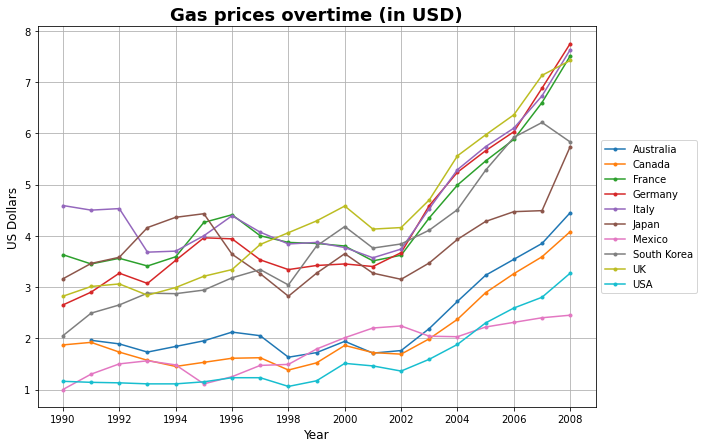

In [2]:
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(10,7))

plt.title('Gas prices overtime (in USD)', fontdict={'fontweight': 'bold', 'fontsize': 18})


### One way to do it: personalize each one:

#plt.plot(gas.Year, gas.USA, 'b.-', markeredgecolor='r', label= 'USA',)
#plt.plot(gas.Year, gas.UK,'r.-', markeredgecolor='b',label= 'UK')
#plt.plot(gas.Year, gas['South Korea'],'g.-', label= 'South Korea' )
#plt.plot(gas.Year, gas.Germany, 'k.-', label= 'Germany')


## or put it all together
for country in gas:
    if country != 'Year':
        plt.plot(gas.Year,gas[country], marker= '.', label = country)
        
    
## Finally, we can add a list with the countries we want to compare: 

#countries_to_compare = ['USA', 'Canada', 'UK', 'Germany']
#for country in gas:
  #  if country in countries_to_compare:
    #    plt.plot(gas.Year,gas[country], marker= '.', label = country)
        

plt.xticks(gas.Year[::2])
plt.xlabel('Year', size= 12)
plt.ylabel('US Dollars', size=12)

plt.grid()

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('Gas Price Overtime', dpi=300)
plt.show()



In [87]:
#fifa.info()
#df_fifa19.nunique()
#df_fifa19.isnull().any()
#df_fifa19.columns   you can select a set of columns in like: chosen_columns = [] or attribute_col = [] etc 
# You can create your dataframe from the chosen columns: #df = pd.DataFrame(fifa, columns = chosen_columns)

### Loading Second Data Set: Fifa stats: 

In [2]:
fifa = pd.read_csv('fifa_data.csv')

pos_attr = fifa[['Position','Acceleration','Aggression','Agility','Balance','BallControl','Composure','Crossing','Curve','Dribbling',
    'FKAccuracy','Finishing','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes','HeadingAccuracy','Interceptions',
    'Jumping','LongPassing','LongShots','Marking','Penalties','Positioning','Reactions','ShortPassing','ShotPower','SlidingTackle','SprintSpeed','Stamina','StandingTackle','Strength','Vision','Volleys']]

attributes = ['Acceleration','Aggression','Agility','Balance','BallControl','Composure','Crossing','Curve','Dribbling',
    'FKAccuracy','Finishing','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes','HeadingAccuracy','Interceptions',
    'Jumping','LongPassing','LongShots','Marking','Penalties','Positioning','Reactions','ShortPassing','ShotPower','SlidingTackle','SprintSpeed','Stamina','StandingTackle','Strength','Vision','Volleys']

fifa.head(5)




,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Histograms plot

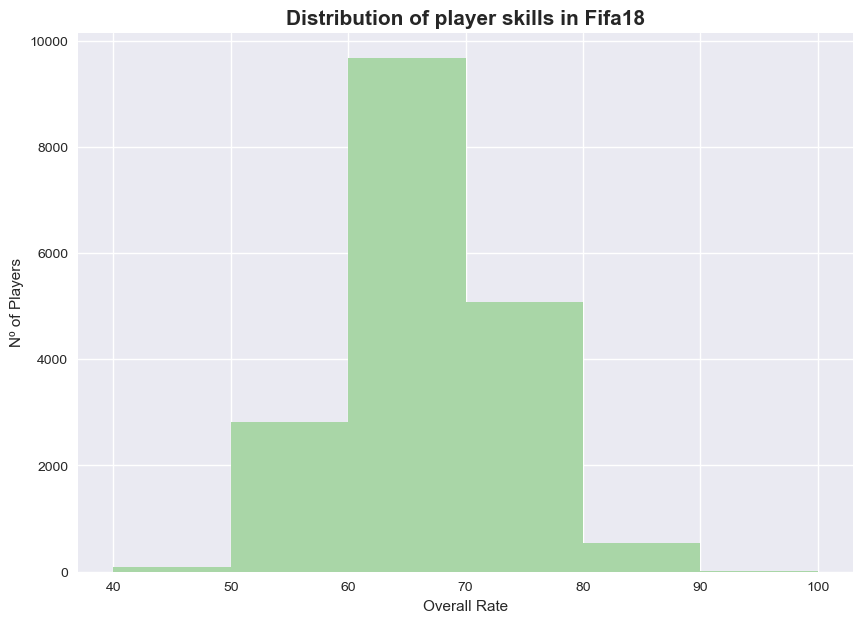

In [89]:

plt.figure(figsize=(10,7))

bins = [40,50,60,70,80,90,100]

plt.hist(fifa.Overall, bins=bins, color= '#a9d6a7')
# Go to color picker to search for specific colors

plt.xticks(bins)


plt.ylabel('Nº of Players')
plt.xlabel('Overall Rate')
plt.title('Distribution of player skills in Fifa18', fontdict={'fontweight': 'bold', 'fontsize': 15})

plt.show()

### Pie Chart :   % People left foot vs right foot


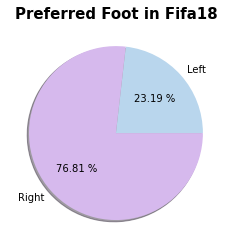

In [5]:
## We create the instances for each one of the foots prefferred: 

left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

labels = ['Left', 'Right']
colors = ['#b9d6ed', '#d6b9ed']

plt.pie([left, right], labels = labels, colors= colors, autopct='%.2f %%', shadow = True)

plt.title('Preferred Foot in Fifa18', fontdict={'fontweight': 'bold', 'fontsize': 15})

plt.show()

### PIE CHART 2:  Weight and Height**

#### Converting our weight data into a float/int ( currently a str 180lbs) 

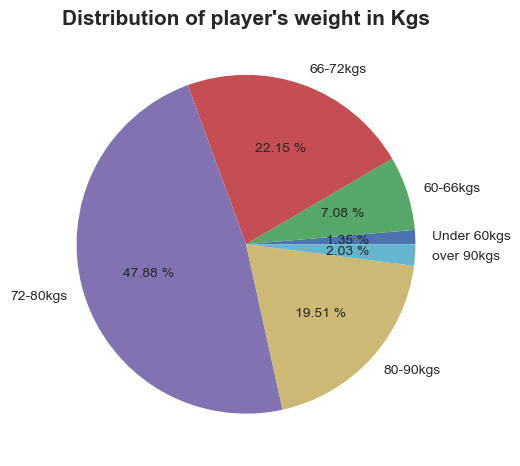

In [90]:
## With this we are stripping lbs from the total value, since esta enganxat sense espais vuits. peró, els numeros == str encara
#fifa.Weight = [x.strip('lbs') if type(x)==str else x for x in fifa.Weight]
fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]
fifa.Weight = fifa.Weight * 0.453592

plt.style.use('seaborn')
# https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html    different styles one could use

light = fifa.loc[fifa.Weight < 60].count()[0]
light_medium = fifa.loc[(fifa.Weight >=60) & (fifa.Weight <66)].count()[0]
medium = fifa.loc[(fifa.Weight >=66) & (fifa.Weight <72)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >=72) & (fifa.Weight <80)].count()[0]
heavy = fifa.loc[(fifa.Weight >=80) & (fifa.Weight <90)].count()[0]
fat = fifa.loc[fifa.Weight >90].count()[0]

plt.title("Distribution of player's weight in Kgs",fontdict={'fontweight': 'bold', 'fontsize': 15})

weights = [light, light_medium, medium, medium_heavy, heavy, fat]
labels = ['Under 60kgs', '60-66kgs', '66-72kgs', '72-80kgs', '80-90kgs','over 90kgs']

plt.pie(weights, labels = labels, autopct='%.2f %%')

plt.show()




### Overall Score Team comparison   - Box and Whiskers chart

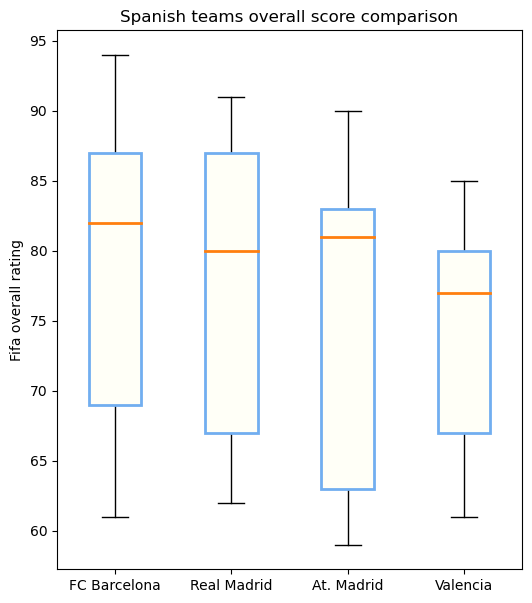

In [7]:
plt.style.use('default')

plt.figure(figsize=(6,7))

barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
real_madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
at_madrid = fifa.loc[fifa.Club == 'Atlético Madrid']['Overall']
valencia = fifa.loc[fifa.Club == 'Valencia CF']['Overall']


labels = ['FC Barcelona', 'Real Madrid', 'At. Madrid','Valencia']

plt.title('Spanish teams overall score comparison')
plt.ylabel('Fifa overall rating')

boxes = plt.boxplot([barcelona, real_madrid, at_madrid, valencia], labels= labels, patch_artist=True, medianprops={'linewidth':2})

for box in boxes['boxes']:
    #set edge color
    box.set(color='#71aef0', linewidth=2)
    
    #set fill color
    box.set(facecolor='#fffff7')


plt.show()


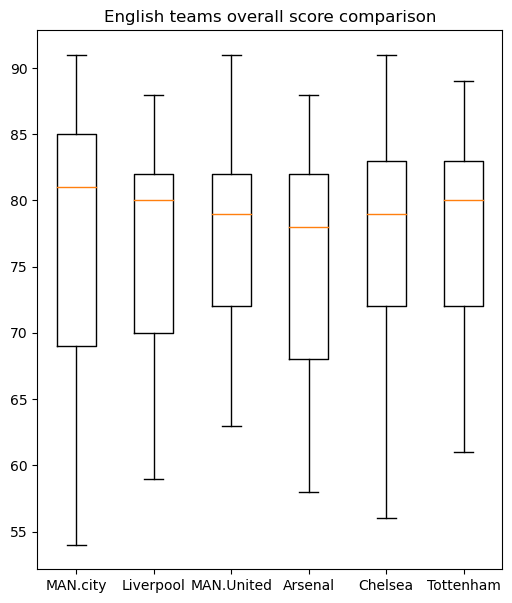

In [8]:
plt.style.use('default')
plt.figure(figsize=(6,7))

manchester_city = fifa.loc[fifa.Club == 'Manchester City']['Overall']
liverpool = fifa.loc[fifa.Club == 'Liverpool']['Overall']
manchester_united = fifa.loc[fifa.Club == 'Manchester United']['Overall']
arsenal = fifa.loc[fifa.Club == 'Arsenal']['Overall']
chelsea = fifa.loc[fifa.Club == 'Chelsea']['Overall']
tottenham = fifa.loc[fifa.Club == 'Tottenham Hotspur']['Overall']


labels = ['MAN.city', 'Liverpool', 'MAN.United','Arsenal','Chelsea','Tottenham']

plt.title('English teams overall score comparison')

boxes = plt.boxplot([manchester_city, liverpool, manchester_united, arsenal, chelsea, tottenham], labels= labels)

plt.show()


### Kaggle Task 1:  Distribution of players nationality 

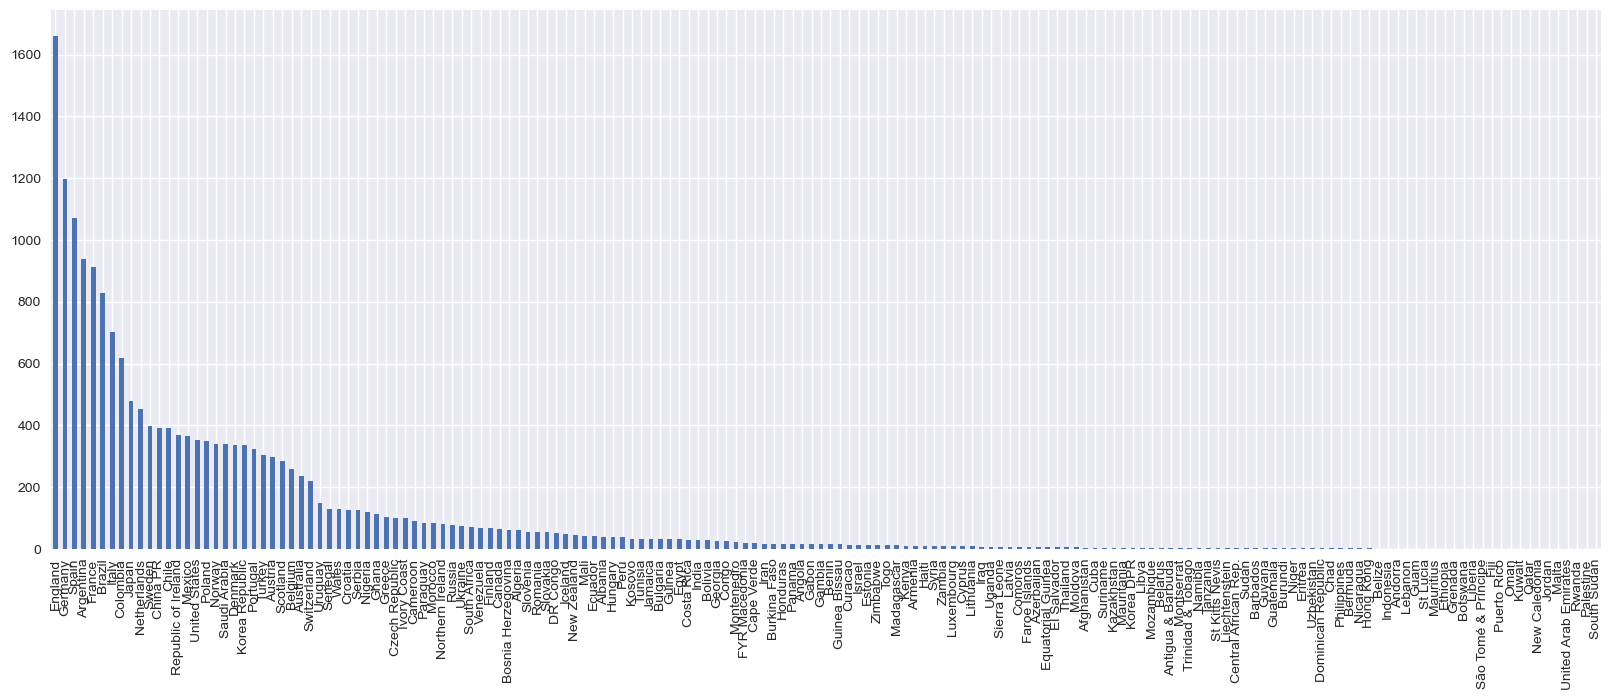

In [91]:
# We need to groupby nationality. First let's check data type: 
#type(fifa.Nationality.head()[0])  
# Now we know we are dealing with a STR. 

nationality = fifa['Nationality'].value_counts()

nationality.plot.bar(figsize = (20,7))



plt.show()



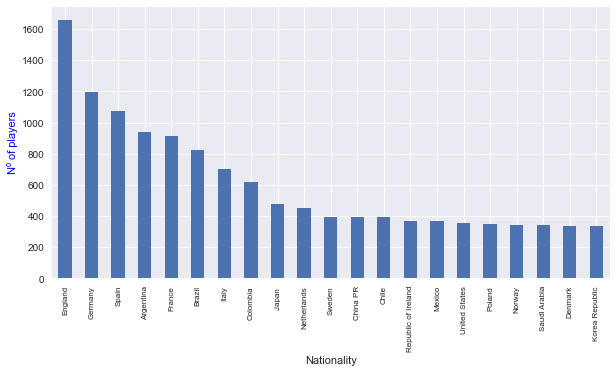

In [4]:
# Top 20 Nationalities (nº of players and their Average overall)

plt.style.use('seaborn')

top_20_nat = fifa['Nationality'].value_counts()[:21]
overall_nations = fifa.groupby('Nationality').mean()['Overall']

nations = ['England','Germany','Spain','Argentina','France','Brazil','Italy','Colombia','Japan ','Netherlands','Sweden','China PR','Chile',                  
'Republic of Ireland','Mexico','United States','Poland','Norway','Saudi Arabia','Denmark','Korea Republic',]  


f

plt.show()

England                1662
Germany                1198
Spain                  1072
Argentina               937
France                  914
Brazil                  827
Italy                   702
Colombia                618
Japan                   478
Netherlands             453
Sweden                  397
China PR                392
Chile                   391
Republic of Ireland     368
Mexico                  366
United States           353
Poland                  350
Norway                  341
Saudi Arabia            340
Denmark                 336
Korea Republic          335
Name: Nationality, dtype: int64

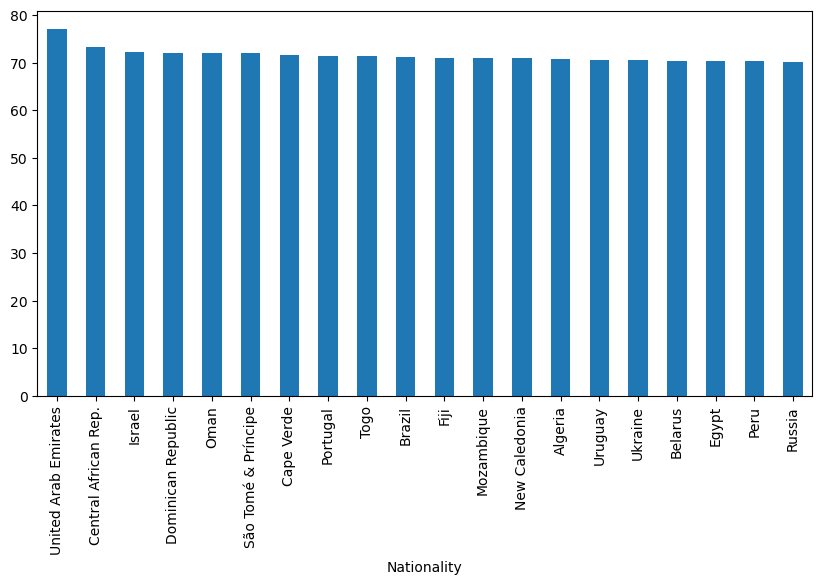

In [10]:
overall_nations = fifa.groupby('Nationality').mean()['Overall'].nlargest(20)


overall_nations.plot.bar(figsize = (10,5))

plt.show()
                               
                               

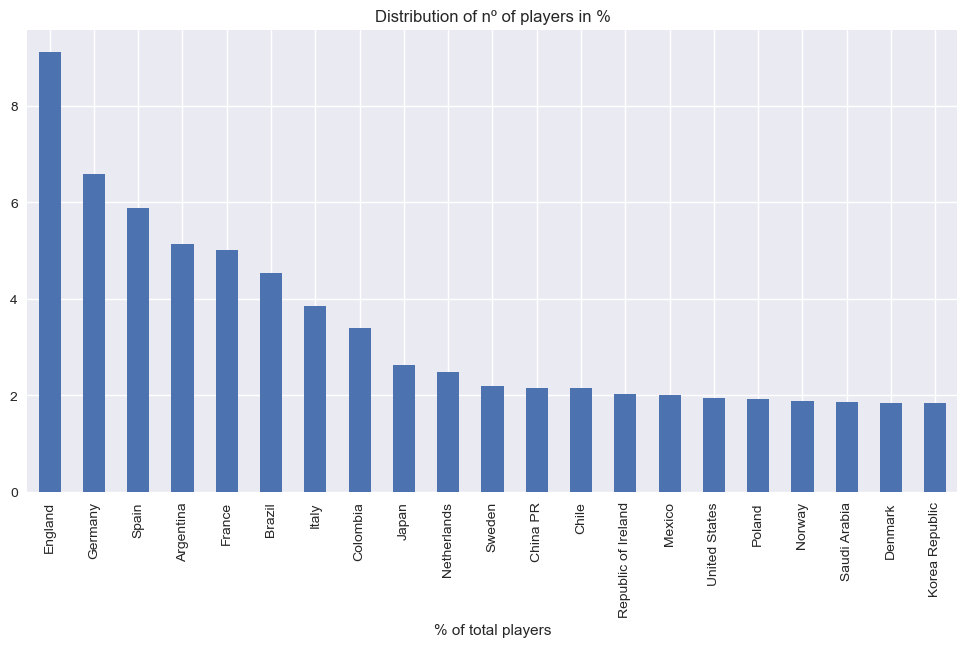

In [93]:
index = fifa.ID

pct_per_country = (top_20_nat / len(index)) * 100

pct_per_country.plot.bar(figsize = (12,6))

plt.xlabel('% of total players')
plt.title('Distribution of nº of players in %')

plt.show()


#### Search country / club / player stats by functions: 

In [95]:
def get_country_stats(country_name):
    country = fifa[fifa['Nationality']==country_name][['Name','Age','Overall','Club','Position','Value']].sort_values('Overall', ascending = False)
    return country


def get_club_stats(club_name):
    club = fifa[fifa['Club']==club_name][['Name','Age','Nationality','Overall','Potential','Wage','Position','Value','Special']]
    return club


def get_player_stats(player_name):
    player = fifa[fifa['Name']==player_name][attributes]
    return player


  

In [104]:
#get_country_stats('Brazil').head(50)

#get_club_stats('FC Barcelona')

#get_player_stats('L. Messi')



,Name,Age,Nationality,Overall,Potential,Wage,Position,Value,Special
0,L. Messi,31,Argentina,94,94,€565K,RF,€110.5M,2202
7,L. Suárez,31,Uruguay,91,91,€455K,RS,€80M,2346
18,M. ter Stegen,26,Germany,89,92,€240K,GK,€58M,1328
20,Sergio Busquets,29,Spain,89,89,€315K,CDM,€51.5M,2065
32,Coutinho,26,Brazil,88,89,€340K,LW,€69.5M,2175
42,S. Umtiti,24,France,87,92,€205K,CB,€57M,2147
49,Jordi Alba,29,Spain,87,87,€250K,LB,€38M,2230
53,I. Rakitić,30,Croatia,87,87,€260K,RCM,€46.5M,2184
54,Piqué,31,Spain,87,87,€240K,RCB,€34M,1950
96,A. Vidal,31,Chile,85,85,€205K,CAM,€26M,2230


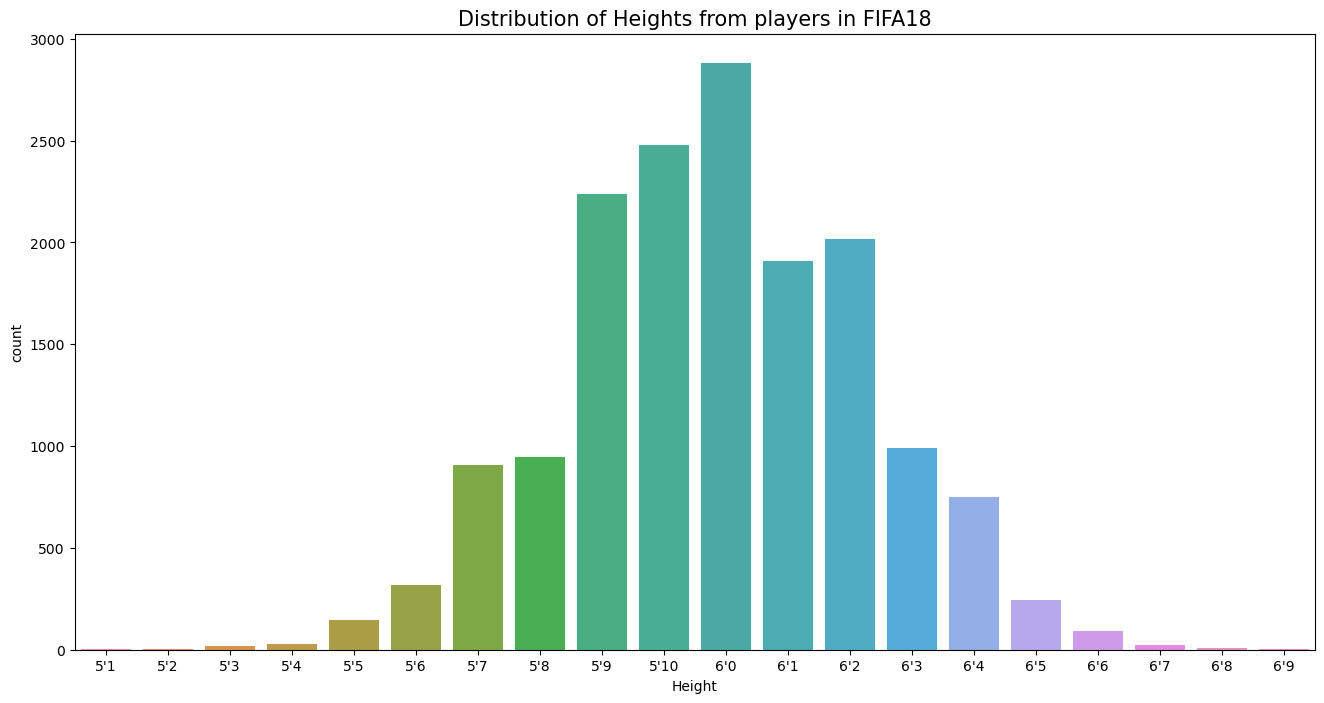

In [13]:
plt.subplots(figsize = (16,8))

#https://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot

heights = ["5'1","5'2","5'3","5'4","5'5","5'6","5'7","5'8","5'9","5'10","6'0","6'1","6'2","6'3","6'4","6'5","6'6","6'7","6'8","6'9"]

sns.countplot(x =('Height'), data = fifa, order = heights)

plt.title('Distribution of Heights from players in FIFA18', fontdict ={'fontsize':15})

plt.show() 

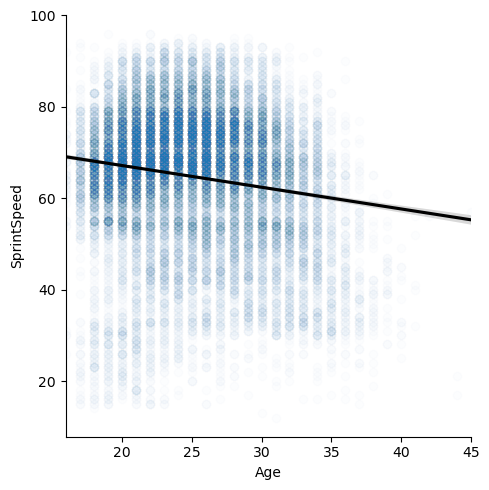

In [14]:
#https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot
# Decrease of Spint speed over time.(age)


sns.lmplot(x='Age', y='SprintSpeed', data = fifa, line_kws={'color':'black'}, scatter_kws={'alpha':0.01})


plt.show()

### Create a new DF with useful columns: 

In [15]:
useful_columns = ['Name', 'Age', 'Nationality', 'Club', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']





new_fifa = pd.DataFrame(fifa, columns= useful_columns) 

### Best players at each position , country, and age

In [105]:
best_in_position = new_fifa.iloc[new_fifa.groupby(new_fifa['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Value', 'Club', 'Nationality','Overall']]

best_in_country = new_fifa.iloc[new_fifa.groupby(new_fifa['Nationality'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Value', 'Club', 'Nationality','Overall']]

best_at_age = new_fifa.iloc[new_fifa.groupby(new_fifa['Age'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Value', 'Club', 'Nationality','Overall']]





,Position,Name,Age,Value,Club,Nationality,Overall
17,CAM,A. Griezmann,27,€78M,Atlético Madrid,France,89
12,CB,D. Godín,32,€44M,Atlético Madrid,Uruguay,90
20,CDM,Sergio Busquets,29,€51.5M,FC Barcelona,Spain,89
271,CF,Luis Alberto,25,€28.5M,Lazio,Spain,82
67,CM,Thiago,27,€45.5M,FC Bayern München,Spain,86
3,GK,De Gea,27,€72M,Manchester United,Spain,91
28,LAM,J. Rodríguez,26,€69.5M,FC Bayern München,Colombia,88
35,LB,Marcelo,30,€43M,Real Madrid,Brazil,88
24,LCB,G. Chiellini,33,€27M,Juventus,Italy,89
11,LCM,T. Kroos,28,€76.5M,Real Madrid,Germany,90



### Continent best nations comparison:      Age & Overall mean rates 


In [106]:
# we create the list of countries we will compare: 

european_nations = ['Italy', 'Spain', 'Germany', 'Portugal', 'France', 'England', 'Netherlands', 'Poland', 'Croatia']
asian_nations = ['Japan', 'Korea Republic', 'Australia', 'China PR']
american_nations =['Colombia', 'Chile', 'Argentina', 'Brazil', 'Ecuador', 'Bolivia', 'Canada', 'Mexico','Peru'] 

# our goal now is to get the data from all the players from the selected countries(list) 

eu_country_age = new_fifa.loc[new_fifa['Nationality'].isin(european_nations) & fifa['Age']]
asian_country_age = new_fifa.loc[new_fifa['Nationality'].isin(asian_nations) & fifa['Age']]
american_country_age = new_fifa.loc[new_fifa['Nationality'].isin(american_nations) & fifa['Age']]

eu_country_age

# Isin only takes lists or values. do not put strings. not even lists with ''. 


,Name,Age,Nationality,Club,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,Cristiano Ronaldo,33,Portugal,Juventus,94,94,€77M,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183.0,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
3,De Gea,27,Spain,Manchester United,91,93,€72M,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
10,R. Lewandowski,29,Poland,FC Bayern München,90,90,€77M,205000.0,2152,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,ST,9.0,"Jul 1, 2014",NaN,2021,6'0,176.0,87+3,87+3,87+3,83+3,86+3,86+3,86+3,83+3,83+3,83+3,83+3,81+3,77+3,77+3,77+3,81+3,61+3,62+3,62+3,62+3,61+3,58+3,57+3,57+3,57+3,58+3,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,65.0,89.0,77.0,78.0,78.0,90.0,78.0,88.0,84.0,78.0,84.0,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,€127.1M
14,N. Kanté,27,France,Chelsea,89,90,€63M,225000.0,2189,Right,3.0,3.0,2.0,Medium/ High,Lean,Yes,LDM,13.0,"Jul 16, 2016",NaN,2023,5'6,159.0,72+3,72+3,72+3,77+3,77+3,77+3,77+3,77+3,79+3,79+3,79+3,79+3,82+3,82+3,82+3,79+3,85+3,87+3,87+3,87+3,85+3,84+3,83+3,83+3,83+3,84+3,68.0,65.0,54.0,86.0,56.0,79.0,49.0,49.0,81.0,80.0,82.0,78.0,82.0,93.0,92.0,71.0,77.0,96.0,76.0,69.0,90.0,92.0,71.0,79.0,54.0,85.0,90.0,91.0,85.0,15.0,12.0,10.0,7.0,10.0,€121.3M
17,A. Griezmann,27,France,Atlético Madrid,89,90,€78M,145000.0,2246,Left,4.0,3.0,4.0,High/ High,Lean,Yes,CAM,7.0,"Jul 28, 2014",NaN,2023,5'9,161.0,86+3,86+3,86+3,87+3,87+3,87+3,87+3,87+3,86+3,86+3,86+3,86+3,80+3,80+3,80+3,86+3,70+3,67+3,67+3,67+3,70+3,67+3,61+3,61+3,61+3,67+3,82.0,90.0,84.0,83.0,87.0,88.0,84.0,78.0,76.0,90.0,88.0,85.0,90.0,90.0,80.0,80.0,90.0,83.0,62.0,82.0,69.0,35.0,91.0,83.0,79.0,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,€165.8M
20,Sergio Busquets,29,Spain,FC Barcelona,89,89,€51.5M,315000.0,2065,Right,4.0,3.0,3.0,Medium/ Medium,Lean,Yes,CDM,5.0,"Sep 1, 2008",NaN,2023,6'2,168.0,71+3,71+3,71+3,74+3,76+3,76+3,76+3,74+3,79+3,79+3,79+3,76+3,83+3,83+3,83+3,76+3,79+3,86+3,86+3,86+3,79+3,78+3,82+3,82+3,82+3,78+3,62.0,67.0,68.0,89.0,44.0,80.0,66.0,68.0,82.0,88.0,50.0,52.0,66.0,87.0,52.0,61.0,66.0,86.0,77.0,54.0,85.0,87.0,77.0,87.0,60.0,90.0,90.0,86.0,80.0,5.0,8.0,13.0,9.0,13.0,€105.6M
24,G. Chiellini,33,Italy,Juventus,89,89,€27M,215000.0,1841,Left,4.0,3.0,2.0,Medium/ High,Normal,Yes,LCB,3.0,"Jul 1, 2005",NaN,2020,6'2,187.0,58+3,58+3,58+3,54+3,55+3,55+3,55+3,54+3,54+3,54+3,54+3,56+3,60+3,60+3,60+3,56+3,74+3,76+3,76+3,76+3,74+3,77+3,86+3,86+3,86+3,77+3,58.0,33.0,83.0,59.0,45.0,58.0,60.0,31.0,59.0,57.0,63.0,75.0,54.0,82.0,55.0,78.0,89.0,65.0,89.0,49.0,92.0,88.0,28.0,50.0,50.0,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,€44.6M
25,K. Mbappé,19,France,Paris Saint-Germain,88,95,€81M,100000.0,2118,Right,3.0,4.0,5.0,High/ Medium,Lean,Yes,RM,10.0,"Jul 1, 2018",NaN,2022,5'10,161.0,85+3,85+3,85+3,

### Plotting the data.  x3 graphs with age for now. 

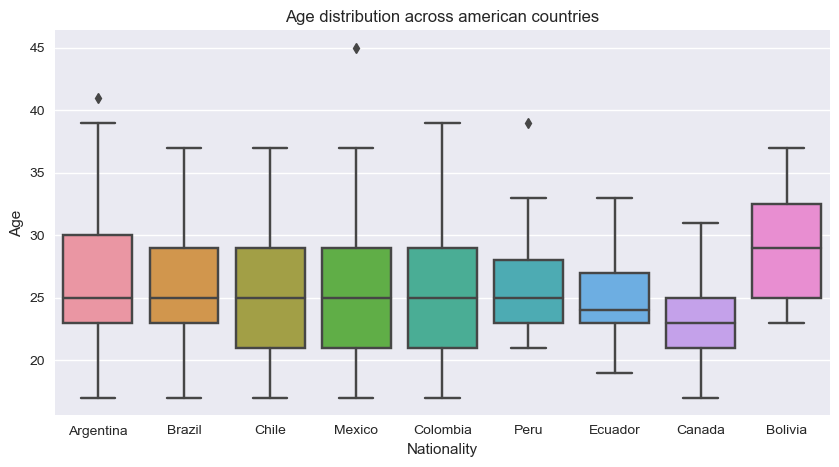

In [107]:
plt.figure(figsize = (10,5))

# European :

#sns.boxplot(x = eu_country_age['Nationality'], y = eu_country_age['Age'], data = new_fifa)
#plt.title('Age distribution across european countries')

# Asian/rest of the World: 

#sns.boxplot(x = asian_country_age['Nationality'], y = asian_country_age['Age'], data = new_fifa)
#plt.title('Age distribution across asian countries')

# American countries: 

sns.boxplot(x = american_country_age['Nationality'], y = american_country_age['Age'], data = new_fifa)
plt.title('Age distribution across american countries')



plt.show()



In [19]:
# The same with Overall

eu_country_overall = new_fifa.loc[new_fifa['Nationality'].isin(european_nations) & fifa['Overall']]
asian_country_overall = new_fifa.loc[new_fifa['Nationality'].isin(asian_nations) & fifa['Overall']]
american_country_overall = new_fifa.loc[new_fifa['Nationality'].isin(american_nations) & fifa['Overall']]

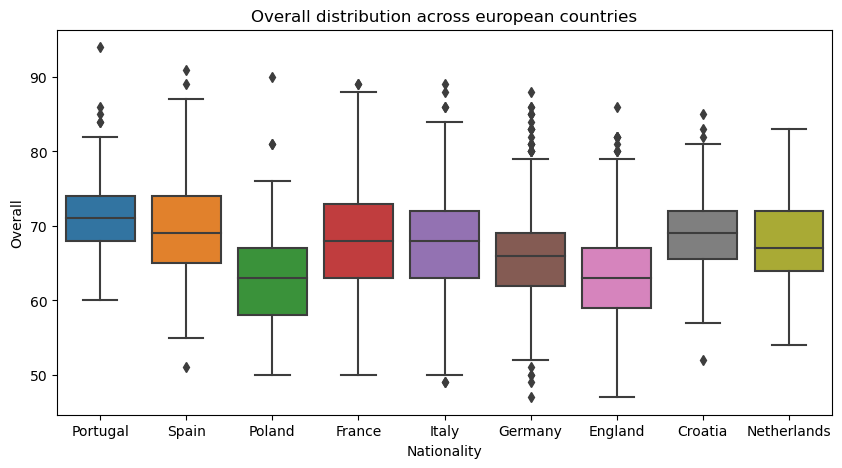

In [20]:
plt.figure(figsize = (10,5))

# European :

sns.boxplot(x = eu_country_age['Nationality'], y = eu_country_age['Overall'], data = new_fifa)
plt.title('Overall distribution across european countries')

# Asian/rest of the World: 

#sns.boxplot(x = asian_country_age['Nationality'], y = asian_country_age['Overall'], data = new_fifa)
#plt.title('Overall distribution across asian countries')

# American countries: 

#sns.boxplot(x = american_country_age['Nationality'], y = american_country_age['Overall'], data = new_fifa)
#plt.title('Overall distribution across american countries')



plt.show()


# Converting Wages and Value into numerical format 

In [21]:
# wage is an object. we need to convert it into numerical format.

def wage_to_numerical(Value):
    change = Value.replace('€',"")
    if 'M'in change:
        change = float(change.replace('M','')) * 100000
    elif 'K' in change:
        change = float(change.replace('K', '')) * 1000
    return float(change)

# definim funció quea gafa com a parametre el salari del jugador. primer creem objecte per treure el simbol € i canviarho per espai.
# change ara es el valor del salari sense el € ( es podria haver fer amb strip.) si cobra o val M, el valor. 1M
# si cobra K, el valor es multiplicara x 1000.  Sempre posant float pq es converteixi el objecte(str fins ara) a float value.

#fifa['Value'] = fifa['Value'].apply(lambda x: wage_to_numerical(x))
#new_fifa['Value'] = new_fifa['Value'].apply(lambda x: wage_to_numerical(x))


# Una vegada s'ha realitzat el canvi, ja no es neccesari tornarho a fer, i donará error. 

In [22]:
#fifa['Wage'] = fifa['Wage'].apply(lambda x: wage_to_numerical(x))
new_fifa['Wage'] = new_fifa['Wage'].apply(lambda x: wage_to_numerical(x))


#### Clubs with the highest wages: 

In [23]:
sum_wages =  new_fifa.groupby('Club').sum().nlargest(10,'Wage')


#sum_wages =  new_fifa.groupby('Club').sum()
#sum_wages = sum_wages.nlargest(10,'Wage')

sum_wages

,Age,Overall,Potential,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Weight,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Club,,,,,,,,,,,,,,,,,,,,,
Real Madrid,793,2582,2793,5017000.0,60025,69.0,106.0,94.0,583.0,5498.0,...,1745.0,2320.0,1882.0,1850.0,1753.0,627.0,627.0,583.0,579.0,615.0
FC Barcelona,787,2575,2815,4837000.0,60791,74.0,108.0,94.0,581.0,5398.0,...,1849.0,2378.0,1938.0,1886.0,1775.0,599.0,601.0,623.0,615.0,617.0
Manchester City,789,2532,2769,3741000.0,60617,69.0,104.0,92.0,1007.0,5393.0,...,1816.0,2319.0,1898.0,1839.0,1699.0,592.0,570.0,578.0,577.0,560.0
Manchester United,817,2549,2728,3391000.0,62117,69.0,106.0,100.0,662.0,5481.0,...,1909.0,2379.0,1871.0,1914.0,1812.0,547.0,545.0,563.0,537.0,565.0
Juventus,679,2057,2138,3292000.0,47610,63.0,80.0,72.0,343.0,4415.0,...,1415.0,1945.0,1600.0,1553.0,1497.0,419.0,402.0,386.0,438.0,450.0
Chelsea,832,2534,2727,3249000.0,59746,70.0,110.0,92.0,731.0,5752.0,...,1862.0,2364.0,1794.0,1837.0,1762.0,577.0,571.0,538.0,560.0,590.0
Liverpool,792,2508,2719,2902000.0,60552,65.0,101.0,100.0,826.0,5337.0,...,1894.0,2373.0,1687.0,1845.0,1748.0,521.0,558.0,519.0,484.0,528.0
Tottenham Hotspur,812,2531,2708,2623000.0,60425,66.0,101.0,92.0,639.0,5657.0,...,1907.0,2339.0,1880.0,1844.0,1735.0,588.0,579.0,563.0,607.0,615.0
Arsenal,812,2481,2686,2588000.0,58412,67.0,98.0,91.0,792.0,5491.0,...,1742.0,2295.0,1808.0,1884.0,1837.0,523.0,532.0,525.0,526.0,515.0


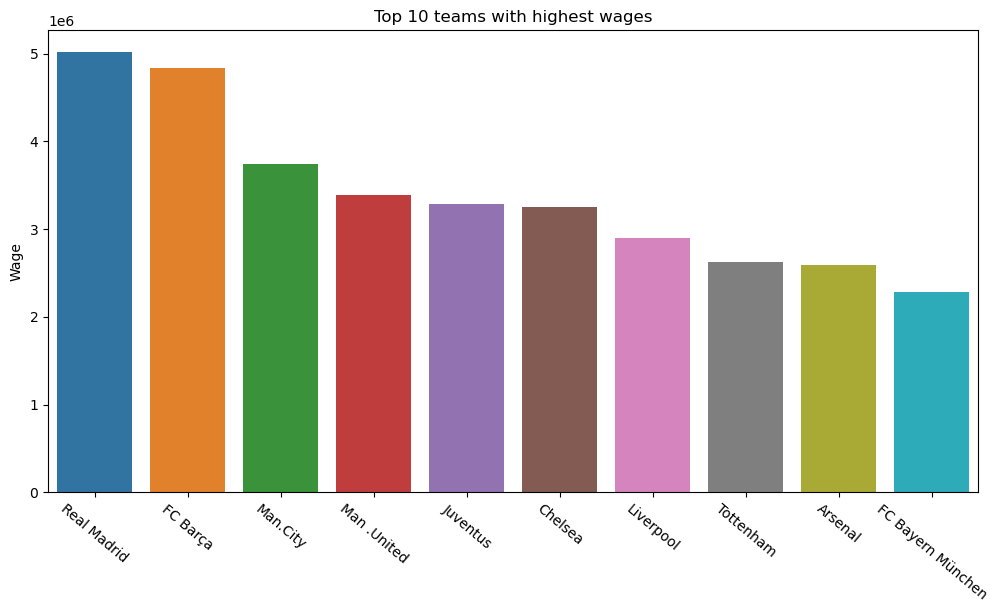

In [25]:
plt.figure(figsize=(12,6))

#Clubs = [club for club, df in sum_wages.groupby('Club')]

labels = ['Real Madrid', 'FC Barça', 'Man.City', 'Man .United' ,'Juventus' ,'Chelsea', 
          'Liverpool', 'Tottenham', 'Arsenal', 'FC Bayern München']


sns.barplot(x = labels , y = 'Wage', data = sum_wages)
plt.title('Top 10 teams with highest wages')

plt.xticks(rotation=-40);

plt.show()


In [36]:
def player_full_bio(player_name):
    bio = new_fifa.loc[(new_fifa['Name'] == player_name)]
    pd.set_option('display.max_columns', 200)
    return bio

#player_full_bio(input('Player Name : '))



### Defining player attributes

In [64]:
# Remember we have created and stored :  attributes and pos_attr:

attributes
#pos_attr

['Acceleration',
 'Aggression',
 'Agility',
 'Balance',
 'BallControl',
 'Composure',
 'Crossing',
 'Curve',
 'Dribbling',
 'FKAccuracy',
 'Finishing',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'HeadingAccuracy',
 'Interceptions',
 'Jumping',
 'LongPassing',
 'LongShots',
 'Marking',
 'Penalties',
 'Positioning',
 'Reactions',
 'ShortPassing',
 'ShotPower',
 'SlidingTackle',
 'SprintSpeed',
 'Stamina',
 'StandingTackle',
 'Strength',
 'Vision',
 'Volleys']

### Best Player per attribute: 

In [75]:
# We will use a while loop which will take all attributes as a range, iterating through each one. 

i = 0
while i < len(attributes):
    print('Best {0} : {1}'.format(attributes[i], new_fifa.loc[new_fifa[attributes[i]].idxmax()][0]))
    i+=1



Best Acceleration : Douglas Costa
Best Aggression : B. Pearson
Best Agility : Neymar Jr
Best Balance : Bernard
Best BallControl : L. Messi
Best Composure : L. Messi
Best Crossing : K. De Bruyne
Best Curve : Quaresma
Best Dribbling : L. Messi
Best FKAccuracy : L. Messi
Best Finishing : L. Messi
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea
Best HeadingAccuracy : Naldo
Best Interceptions : N. Kanté
Best Jumping : Cristiano Ronaldo
Best LongPassing : T. Kroos
Best LongShots : L. Messi
Best Marking : A. Barzagli
Best Penalties : M. Balotelli
Best Positioning : Cristiano Ronaldo
Best Reactions : Cristiano Ronaldo
Best ShortPassing : L. Modrić
Best ShotPower : Cristiano Ronaldo
Best SlidingTackle : Sergio Ramos
Best SprintSpeed : K. Mbappé
Best Stamina : N. Kanté
Best StandingTackle : G. Chiellini
Best Strength : A. Akinfenwa
Best Vision : L. Messi
Best Volleys : E. Cavani


#### Most important attributes per position:

In [78]:
# we need to iterate through a list 

for i, attr in pos_attr.groupby(pos_attr['Position'])[attributes].mean().iterrows():
    print('Position --> {}: {} {} {} {} {}'.format(i, *tuple(attr.nlargest(5).index)))


 
    

Position --> CAM: Balance Agility Acceleration SprintSpeed BallControl
Position --> CB: Strength Jumping StandingTackle Aggression HeadingAccuracy
Position --> CDM: Stamina Aggression Strength ShortPassing Jumping
Position --> CF: Agility Balance Acceleration SprintSpeed Dribbling
Position --> CM: Balance ShortPassing Agility Stamina Acceleration
Position --> GK: GKReflexes GKDiving GKPositioning GKHandling GKKicking
Position --> LAM: Agility Balance SprintSpeed Acceleration Dribbling
Position --> LB: SprintSpeed Acceleration Stamina Balance Agility
Position --> LCB: Strength Jumping StandingTackle Aggression HeadingAccuracy
Position --> LCM: Stamina ShortPassing Balance Agility BallControl
Position --> LDM: Stamina ShortPassing Strength Aggression BallControl
Position --> LF: Balance Agility Acceleration Dribbling BallControl
Position --> LM: Acceleration SprintSpeed Agility Balance Dribbling
Position --> LS: SprintSpeed Strength Acceleration ShotPower Positioning
Position --> LW: Acc

### Lets plot this data

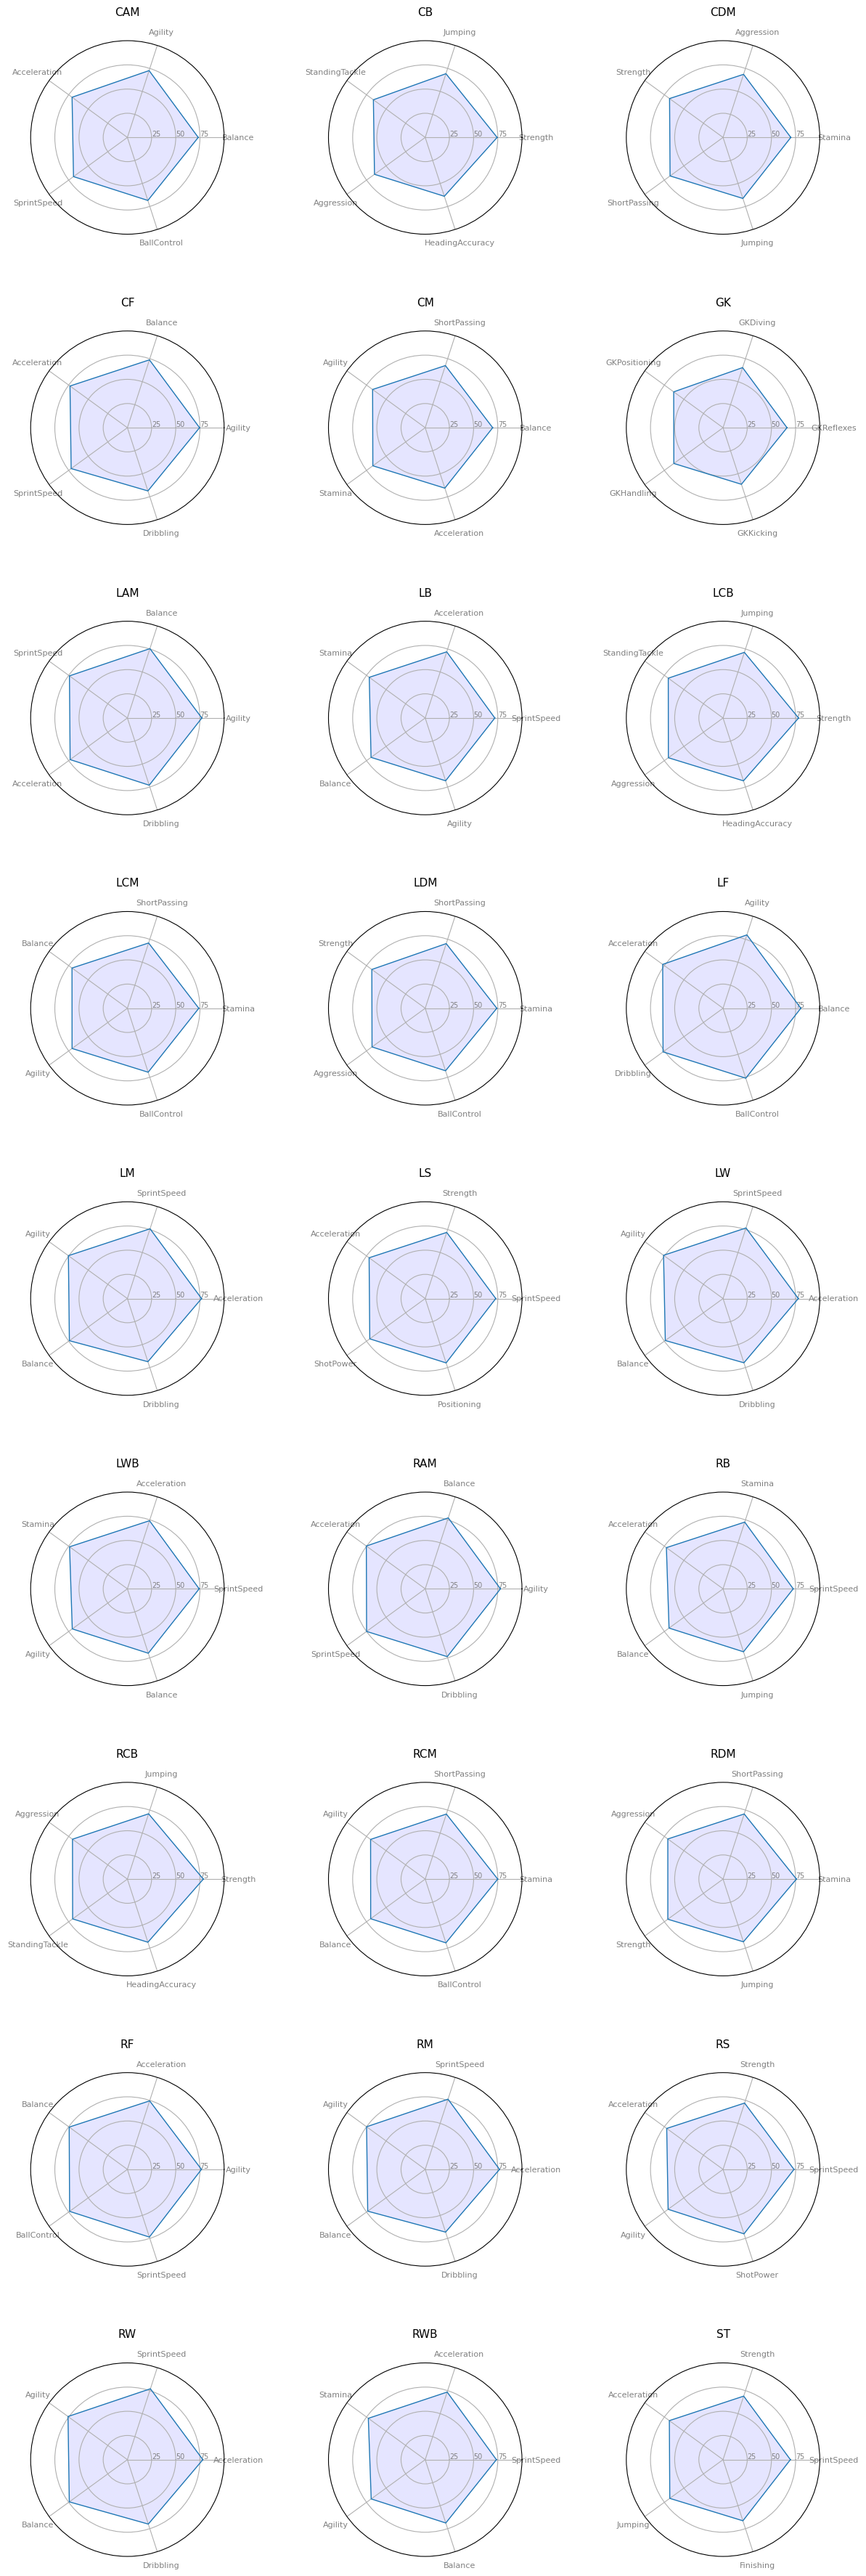

In [83]:
from math import pi

idx = 1 

plt.figure(figsize=(15,45))

for position_name, features in new_fifa.groupby(new_fifa['Position'])[attributes].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable: 
    categories = top_features.keys()
    N = len(categories)
    
    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values+= values[:1]
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
     
    
    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    
    
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 